# Filtering Spam Email Messages Using Naive Bayes Algorithm

### Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


### Importing the Data Set

In [42]:
data_path = "Data/emails.csv"
message_dataset = pd.read_csv(data_path, engine = 'python')
message_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


This prints out the first 5 rows of the data set and shows us our two columns: `text` and `spam`.

In [43]:
message_dataset.shape

(5728, 2)

This shows that our dataset includes 5,728 emails.

### Data Visualization

<Axes: ylabel='spam'>

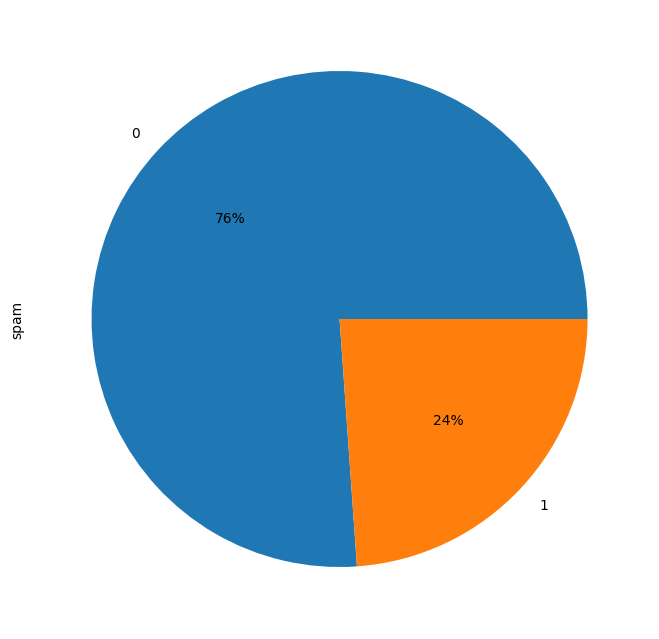

In [44]:
plt.rcParams['figure.figsize'] = [8,10]
message_dataset.spam.value_counts().plot(kind = 'pie', autopct = '%1.0f%%', ylabel = 'spam')

This chart shows that 24% of the emails in our dataset are spam. The 1 represents spam and the 0 represents not spam.

In [45]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


message_dataset['text_without_sw'] = message_dataset['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in (stop)]))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/carter/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


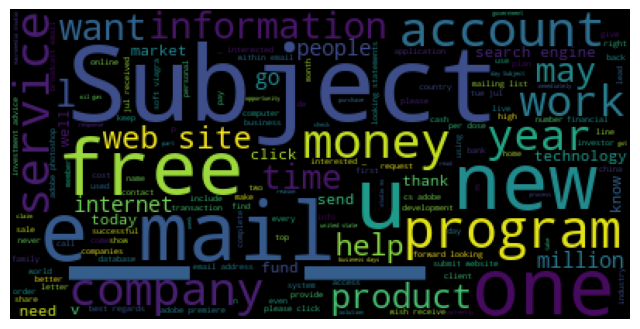

In [ ]:
message_dataset_spam = message_dataset[message_dataset['spam'] == 1]

plt.rcParams['figure.figsize'] = [8,10]
text = ' '.join(message_dataset_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Creates a word cloud to visualize the most common words in the spam emails. These include terms like money, free, thank, account, program, and service.

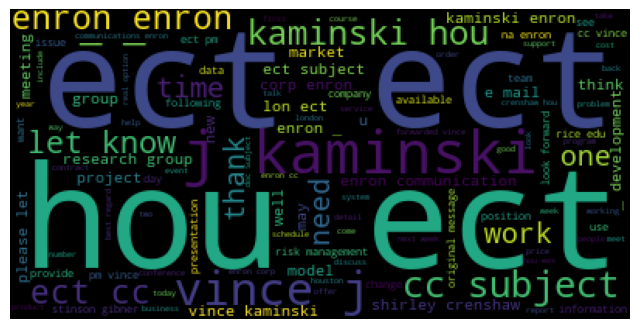

In [ ]:
message_dataset_ham = message_dataset[message_dataset['spam'] == 0]

plt.rcParams['figure.figsize'] = [8,10]
text = ' '.join(message_dataset_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In contrast to the spam emails, the word cloud for the non-spam emails includes terms like time, work, and need.

### Cleaning the Data

In [ ]:
X = message_dataset['text']

y = message_dataset['spam']

In [ ]:
def clean_text(doc):
    
    document = re.sub('[^a-zA-Z]', ' ', doc)
    
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    document = re.sub(r'\s+', ' ', document)
    
    return document

In [ ]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

### Convert Text to Numbers

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriezer = TfidfVectorizer(max_features = 2500, min_df = 5, max_df = 0.7, stop_words = stopwords.words('english'))
X = vectoriezer.fit_transform(X_sentences).toarray()

This uses creates a feature dictionary using the 2500 most common words in the emails. It then uses the feature dictionary to convert the emails into a list of numbers.

### Training the Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

### Evaluation the Model Performance

In [ ]:
y_pred = spam_detector.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[849   7]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9781849912739965


This shows that the model we created is 97.81% accurate when compared to the actual values in the test set.

### Making Predictions on a Single Instance

In [ ]:
print(X_sentences[56])
print(y[56])

Subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1


This shows the 56th email in the test set is spam.

In [ ]:
print(spam_detector.predict(vectoriezer.transform([X_sentences[56]])))

[1]


We then use our model to predict whether the 56th email is spam. Our model predicts that the 56th email is spam.